Patrick Jean-Baptiste

The CUNY Graduate Center

# Description: Visual Models

This notebook builds different models for recognizing emotions in images. The visual models differ in the type of layers as well as the number of layers and nodes. The images of actors' faces expressing an emotion were extracted in a previous notebook.

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from get_images import get_images
from get_data import get_data
from match_files import match_files

Retrieve the images of the actors' faces expressing an emotion along with the corresponding labels that indicate the type of emotion expressed in the images.

In [2]:
img_dir = "Emotion_Images"

Emotion_Images, Emotion_Labels, Emotion_File_Names, img_size = get_images(img_dir)

Print the shape of the array containing the images of expressed emotion.

In [3]:
print(Emotion_Images.shape)

(4902, 128, 128, 3)


Print the shape of the array containing the labels that correspond to the types of emotion expressed.

In [4]:
print(Emotion_Labels.shape)

(4902,)


Split the audio emotion data into a train, validation, and test set. 

In [5]:
train = pd.read_csv("DatasetSplitCSV/train.csv",header=None)
val = pd.read_csv("DatasetSplitCSV/valid.csv",header=None)
test = pd.read_csv("DatasetSplitCSV/test.csv",header=None)

In [6]:
train.describe()

,0,1
count,1470,1470
unique,1470,8
top,03-01-03-02-01-01-24.wav,sad
freq,1,232


In [7]:
val.describe()

,0,1
count,491,491
unique,491,8
top,03-01-07-01-02-01-15.wav,happy
freq,1,88


In [8]:
test.describe()

,0,1
count,491,491
unique,491,8
top,03-02-06-02-02-01-08.wav,fear
freq,1,78


Retrieve the names of the image files along with the corresponding labels that correlate to the train, validation, and test sets from the audio emotion data.

In [9]:
train_files, train_labels = get_data(train)
val_files, val_labels = get_data(val)
test_files, test_labels = get_data(test)

Match the image file names with the images of expressed emotion in order to create the train, validation, and test sets for visual emotion.

In [10]:
X_train, y_train = match_files(Emotion_File_Names, Emotion_Images, Emotion_Labels, train_files)
X_val, y_val = match_files(Emotion_File_Names, Emotion_Images, Emotion_Labels, val_files)
X_test, y_test = match_files(Emotion_File_Names, Emotion_Images, Emotion_Labels, test_files)

Define the architecture of the visual models.

In [11]:
def visual_model1(img_size):
    
    # Create a sequential model.
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(4, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten()) 
    model.add(tf.keras.layers.Dense(32, activation='relu')) 
    model.add(tf.keras.layers.Dense(8, activation='softmax'))
    
    return model


def visual_model2(img_size):
    
    # Create a sequential model.
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_size, img_size, 3), 
                                 padding='valid', strides=1))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='valid', strides=1))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', padding='valid', strides=1))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(tf.keras.layers.Flatten()) 
    model.add(tf.keras.layers.Dense(8, activation='softmax')) 
    
    return model


def visual_model3(img_size):
    
    # Create a sequential model.
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_size, img_size, 3), 
                                 padding='valid', strides=1))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='valid', strides=1))
    model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='valid', strides=1))
    model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='valid', strides=1))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', padding='valid', strides=1))
    model.add(tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', padding='valid', strides=1))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(tf.keras.layers.Flatten()) 
    model.add(tf.keras.layers.Dense(128, activation='relu')) 
    model.add(tf.keras.layers.Dense(8, activation='softmax')) 
    
    return model
              


Create the visual models.

In [12]:
visual_emotion_model1 = visual_model1(img_size)
visual_emotion_model2 = visual_model2(img_size)
visual_emotion_model3 = visual_model3(img_size)

Compile the visual models.

In [13]:
visual_emotion_model1.compile(loss='mae', 
                    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
                    metrics=['mse', 'RootMeanSquaredError', 'mae', 'accuracy'])

visual_emotion_model2.compile(loss='mse', 
                    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
                    metrics=['mse', 'RootMeanSquaredError', 'mae', 'accuracy']) 

visual_emotion_model3.compile(loss='mse', 
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                    metrics=['mse', 'RootMeanSquaredError', 'mae', 'accuracy']) 

Train the first visual model.

In [14]:
early1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=150, verbose=1, mode='auto')

history1 = visual_emotion_model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=75, 
                                   callbacks=[early1])

Train on 2824 samples, validate on 942 samples
Epoch 1/5
2824/2824 [==============================] - 29s 10ms/sample - loss: 0.2299 - mse: 0.2297 - RootMeanSquaredError: 0.4793 - mae: 0.2299 - accuracy: 0.0804 - val_loss: 0.2272 - val_mse: 0.2272 - val_RootMeanSquaredError: 0.4766 - val_mae: 0.2272 - val_accuracy: 0.0913
Epoch 2/5
2824/2824 [==============================] - 27s 10ms/sample - loss: 0.2294 - mse: 0.2294 - RootMeanSquaredError: 0.4789 - mae: 0.2294 - accuracy: 0.0825 - val_loss: 0.2272 - val_mse: 0.2272 - val_RootMeanSquaredError: 0.4766 - val_mae: 0.2272 - val_accuracy: 0.0913
Epoch 3/5
2824/2824 [==============================] - 28s 10ms/sample - loss: 0.2294 - mse: 0.2294 - RootMeanSquaredError: 0.4789 - mae: 0.2294 - accuracy: 0.0825 - val_loss: 0.2272 - val_mse: 0.2272 - val_RootMeanSquaredError: 0.4766 - val_mae: 0.2272 - val_accuracy: 0.0913
Epoch 4/5
2824/2824 [==============================] - 30s 11ms/sample - loss: 0.2294 - mse: 0.2294 - RootMeanSquaredError

Train the second visual model.

In [15]:
early2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

history2 = visual_emotion_model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=100, 
                                   callbacks=[early2])

Train on 2824 samples, validate on 942 samples
Epoch 1/3
2824/2824 [==============================] - 393s 139ms/sample - loss: 0.1910 - mse: 0.1910 - RootMeanSquaredError: 0.4371 - mae: 0.1911 - accuracy: 0.2355 - val_loss: 0.1863 - val_mse: 0.1863 - val_RootMeanSquaredError: 0.4316 - val_mae: 0.1863 - val_accuracy: 0.2548
Epoch 2/3
2824/2824 [==============================] - 411s 146ms/sample - loss: 0.1909 - mse: 0.1909 - RootMeanSquaredError: 0.4369 - mae: 0.1909 - accuracy: 0.2365 - val_loss: 0.1863 - val_mse: 0.1863 - val_RootMeanSquaredError: 0.4316 - val_mae: 0.1863 - val_accuracy: 0.2548
Epoch 3/3
2824/2824 [==============================] - 368s 130ms/sample - loss: 0.1909 - mse: 0.1909 - RootMeanSquaredError: 0.4369 - mae: 0.1909 - accuracy: 0.2365 - val_loss: 0.1863 - val_mse: 0.1863 - val_RootMeanSquaredError: 0.4316 - val_mae: 0.1863 - val_accuracy: 0.2548


Train the third visual model.

In [16]:
early3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

history3 = visual_emotion_model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=100, 
                                   callbacks=[early3])

Train on 2824 samples, validate on 942 samples
Epoch 1/3
2824/2824 [==============================] - 609s 216ms/sample - loss: 0.2423 - mse: 0.2423 - RootMeanSquaredError: 0.4923 - mae: 0.2437 - accuracy: 0.0258 - val_loss: 0.2500 - val_mse: 0.2500 - val_RootMeanSquaredError: 0.5000 - val_mae: 0.2500 - val_accuracy: 0.0000e+00
Epoch 2/3
2824/2824 [==============================] - 581s 206ms/sample - loss: 0.2500 - mse: 0.2500 - RootMeanSquaredError: 0.5000 - mae: 0.2500 - accuracy: 0.0000e+00 - val_loss: 0.2500 - val_mse: 0.2500 - val_RootMeanSquaredError: 0.5000 - val_mae: 0.2500 - val_accuracy: 0.0000e+00
Epoch 3/3
2824/2824 [==============================] - 624s 221ms/sample - loss: 0.2500 - mse: 0.2500 - RootMeanSquaredError: 0.5000 - mae: 0.2500 - accuracy: 0.0000e+00 - val_loss: 0.2500 - val_mse: 0.2500 - val_RootMeanSquaredError: 0.5000 - val_mae: 0.2500 - val_accuracy: 0.0000e+00


Plot the training mean squared error, root mean squared error, mean absolute error, and accuracy for the first visual model.

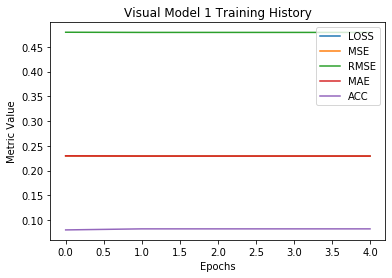

In [17]:
plt.title('Visual Model 1 Training History')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.plot(history1.history['loss'], label='LOSS')
plt.plot(history1.history['mse'], label='MSE')
plt.plot(history1.history['RootMeanSquaredError'], label='RMSE')
plt.plot(history1.history['mae'], label='MAE')
plt.plot(history1.history['accuracy'], label='ACC')
plt.legend()
plt.show()

Plot the validation mean squared error, root mean squared error, mean absolute error, and accuracy for the first visual model.

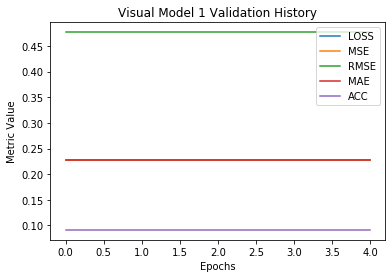

In [18]:
plt.title('Visual Model 1 Validation History')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.plot(history1.history['val_loss'], label='LOSS')
plt.plot(history1.history['val_mse'], label='MSE')
plt.plot(history1.history['val_RootMeanSquaredError'], label='RMSE')
plt.plot(history1.history['val_mae'], label='MAE')
plt.plot(history1.history['val_accuracy'], label='ACC')
plt.legend()
plt.show()

Plot the training mean squared error, root mean squared error, mean absolute error, and accuracy for the second visual model.

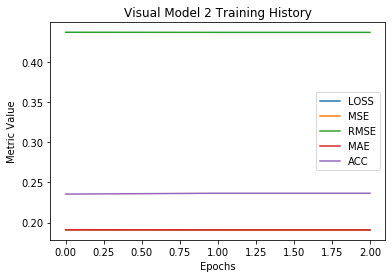

In [19]:
plt.title('Visual Model 2 Training History')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.plot(history2.history['loss'], label='LOSS')
plt.plot(history2.history['mse'], label='MSE')
plt.plot(history2.history['RootMeanSquaredError'], label='RMSE')
plt.plot(history2.history['mae'], label='MAE')
plt.plot(history2.history['accuracy'], label='ACC')
plt.legend()
plt.show()

Plot the validation mean squared error, root mean squared error, mean absolute error, and accuracy for the second visual model.

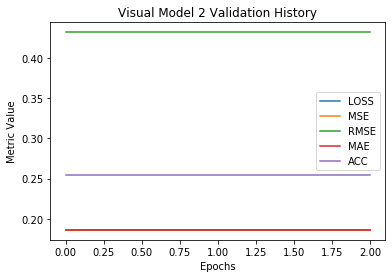

In [20]:
plt.title('Visual Model 2 Validation History')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.plot(history2.history['val_loss'], label='LOSS')
plt.plot(history2.history['val_mse'], label='MSE')
plt.plot(history2.history['val_RootMeanSquaredError'], label='RMSE')
plt.plot(history2.history['val_mae'], label='MAE')
plt.plot(history2.history['val_accuracy'], label='ACC')
plt.legend()
plt.show()

Plot the training mean squared error, root mean squared error, mean absolute error, and accuracy for the third visual model.

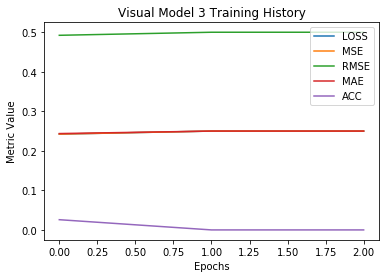

In [21]:
plt.title('Visual Model 3 Training History')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.plot(history3.history['loss'], label='LOSS')
plt.plot(history3.history['mse'], label='MSE')
plt.plot(history3.history['RootMeanSquaredError'], label='RMSE')
plt.plot(history3.history['mae'], label='MAE')
plt.plot(history3.history['accuracy'], label='ACC')
plt.legend()
plt.show()

Plot the validation mean squared error, root mean squared error, mean absolute error, and accuracy for the third visual model.

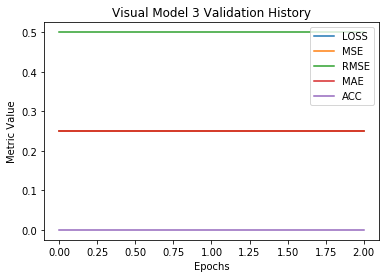

In [22]:
plt.title('Visual Model 3 Validation History')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.plot(history3.history['val_loss'], label='LOSS')
plt.plot(history3.history['val_mse'], label='MSE')
plt.plot(history3.history['val_RootMeanSquaredError'], label='RMSE')
plt.plot(history3.history['val_mae'], label='MAE')
plt.plot(history3.history['val_accuracy'], label='ACC')
plt.legend()
plt.show()

Evaluate the first visual model.

In [23]:
scores1 = visual_emotion_model1.evaluate(X_test, y_test)

948/948 [==============================] - 3s 3ms/sample - loss: 0.2331 - mse: 0.2331 - RootMeanSquaredError: 0.4828 - mae: 0.2331 - accuracy: 0.0675


Evaluate the second visual model.

In [24]:
scores2 = visual_emotion_model2.evaluate(X_test, y_test)

948/948 [==============================] - 27s 29ms/sample - loss: 0.1920 - mse: 0.1920 - RootMeanSquaredError: 0.4382 - mae: 0.1920 - accuracy: 0.2321


Evaluate the third visual model.

In [25]:
scores3 = visual_emotion_model3.evaluate(X_test, y_test)

948/948 [==============================] - 35s 37ms/sample - loss: 0.2500 - mse: 0.2500 - RootMeanSquaredError: 0.5000 - mae: 0.2500 - accuracy: 0.0000e+00


The second visual model achieved the highest accuracy compared to the other two visual models. However, the second visual model still generated poor emotion recognition performance. Different model architectures and training parameters were experimented with, but they generated similar results to the second visual model at best. Perhaps increasing the number of training images in each emotion class and training with more epochs could improve the emotion recognition performance.